## Model Training

#### Import Data and Required Packages

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [4]:
X = df.drop(columns=['math_score'],axis=1)

In [11]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [5]:
print("Categories: ", end=" ")

print("\n\t1. gender: ", df['gender'].unique())
print("\t2. race_ethnicity: ", df['race_ethnicity'].unique())
print("\t3. parental level of education: ", df['parental_level_of_education'].unique())
print("\t4. lunch: ", df['lunch'].unique())
print("\t5. test preparation course: ", df['test_preparation_course'].unique())

Categories:  
	1. gender:  ['female' 'male']
	2. race_ethnicity:  ['group B' 'group C' 'group A' 'group D' 'group E']
	3. parental level of education:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
	4. lunch:  ['standard' 'free/reduced']
	5. test preparation course:  ['none' 'completed']


In [6]:
y = df['math_score']

In [7]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [8]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Create Column Transformer with 3 types of transformers
numerical_features = X.select_dtypes(exclude="object").columns
categorical_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
one_hot_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", one_hot_transformer, categorical_features),
        ("StandardScaler", numeric_transformer, numerical_features),        
    ]
)

In [9]:
X = preprocessor.fit_transform(X)

In [10]:
X.shape

(1000, 19)

In [14]:
X[0]

array([1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 0.19399858, 0.39149181])

In [15]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
X_train.shape, X_test.shape

((800, 19), (200, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [16]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [18]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.2761
- Mean Absolute Error: 4.2055
- R2 Score: 0.8796
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5396
- Mean Absolute Error: 4.4370
- R2 Score: 0.8625


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.4936
- Mean Absolute Error: 5.1109
- R2 Score: 0.8177
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5424
- Mean Absolute Error: 5.2077
- R2 Score: 0.8082


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2763
- Mean Absolute Error: 4.2044
- R2 Score: 0.8796
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5410
- Mean Absolute Error: 4.4382
- R2 Score: 0.8625


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7129
- Mean Absolute Error: 4.5020
- R2 Score: 0.8589
-----------------------

### Results

In [24]:
pd.DataFrame(
        list(zip(model_list, r2_list)), 
        columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],
        ascending=False
    )

,Model Name,R2_Score
0,Linear Regression,0.862527
2,Ridge,0.862454
7,CatBoosting Regressor,0.827214
5,Random Forest Regressor,0.814498
1,Lasso,0.808249
6,XGBRegressor,0.807973
8,AdaBoost Regressor,0.797061
3,K-Neighbors Regressor,0.773606
4,Decision Tree,0.681413


## Linear Regression

In [25]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 86.25


## Plot y_pred and y_test

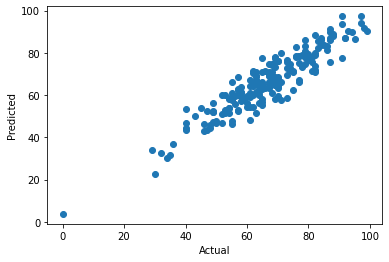

In [28]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

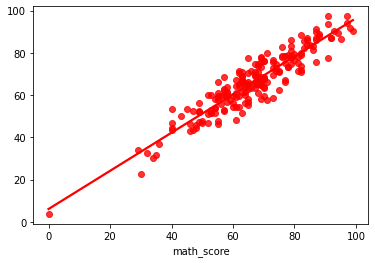

In [29]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [30]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
890,86,83.482779,2.517221
694,49,51.902578,-2.902578
798,69,67.336689,1.663311
147,73,69.622232,3.377768
858,52,50.993922,1.006078
...,...,...,...
150,62,71.543858,-9.543858
279,73,58.822703,14.177297
544,64,56.091990,7.908010
568,63,51.414207,11.585793
